# Initialisation

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import scipy.sparse

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Partie 1 : Approximation spatiale du Laplacien

## Condition de Dirichlet

In [2]:
#  Discrétisation en espace
xmin = 0.0; xmax = 1.8; nptx = 16; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 16; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

In [3]:
# condition mu
mu = 1

#création de la matrice B
B = scipy.sparse.diags([-mu/hx**2, mu*(2/hy**2 + 2/hx**2), -mu/hx**2], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1 # condition limite
B[-1,-1] = 1
B[0,1]=0
B[-1,-2] = 0

#création de la matrice C
C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0

#création de la matrice bloc tridiagonal A
A = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

#plot pour visualiser nos matrices
# plt.imshow(A, cmap='viridis')
# plt.imshow(B, cmap='viridis')
# plt.imshow(C, cmap='viridis')

In [4]:
#  Solution and source terms
u = np.zeros((nx+2)*(ny+2)) #Numerical solution
u_ex = np.zeros((nx+2)*(ny+2)) #Exact solution
F = np.zeros((nx+2)*(ny+2)) #Source term

# Source term
def Source_int(x):
    return (np.pi**2+ (np.pi**2)/xmax**2)*(np.sin(np.pi*x[0]/xmax)*np.sin(np.pi*x[1]))
def Source_bnd(x):
    return np.sin(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])
def Sol_sin(x):
    return np.sin(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])
for i in range(nptx):
    for j in range(npty):
        coord = np.array([i*hx,j*hy])
        u_ex[j*(nx+2) + i] = Sol_sin(coord)
    if i==0 or i==nptx-1: # Boundary x=0 ou x=xmax
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            F[j*(nx+2) + i]=Source_bnd(coord)
    else:
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            if j==0 or j==npty-1: # Boundary y=0 ou y=ymax
                F[j*(nx+2) + i]=Source_bnd(coord)
            else:
                F[j*(nx+2) + i]=Source_int(coord)

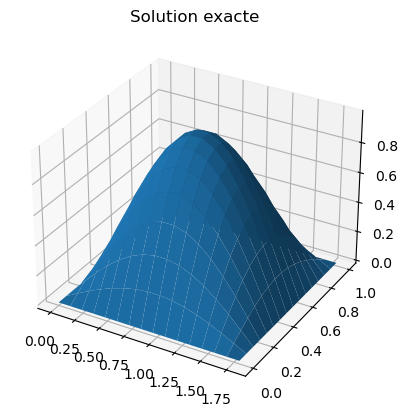

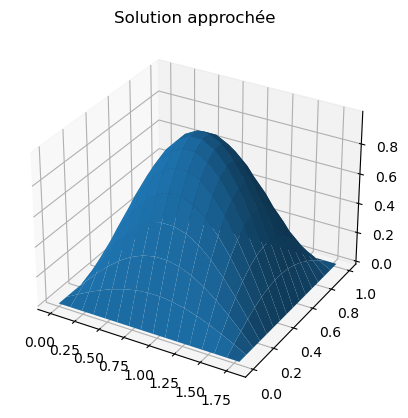

In [5]:
#Post-traintement u_ex+Visualization of the exact solution
uu_ex = np.reshape(u_ex,(nx+2 ,ny+2),order = 'F');
X,Y = np.meshgrid(xx,yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu_ex.T,rstride = 1, cstride = 1);
plt.title("Solution exacte")
plt.savefig('solution_exacte.png') 

#solution approchée
u = npl.solve(A,F)
uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu.T,rstride = 1, cstride = 1);
plt.title("Solution approchée")
plt.savefig('solution_approchee.png')  

In [6]:
# Error
print('norm L2 = ',npl.norm(u-u_ex))

norm L2 =  0.027475801675018556


## Condition de Neumann

In [7]:
#  Discrétisation en espace
xmin = 0.0; xmax = 1.8; nptx = 16; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 16; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

In [34]:
# condition mu
mu = 1

#création de la matrice B
B = scipy.sparse.diags([-mu/hx**2, mu*(2/hy**2 + 2/hx**2), -mu/hx**2], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1
B[0,1]=0
B[-1,-1]=3/(2*hx)
B[-1,-2]=-4/(2*hx)
B[-1,-3]=1/(2*hx)
# print(B)
#création de la matrice C
C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0

#création de la matrice bloc tridiagonal A
A = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

# plt.imshow(A, cmap='viridis')
# plt.imshow(B, cmap='viridis')
# plt.imshow(C, cmap='viridis')

In [24]:
# Solution and source terms
u = np.zeros((nx+2)*(ny+2)) #Numerical solution
u_ex = np.zeros((nx+2)*(ny+2)) #Exact solution
F = np.zeros((nx+2)*(ny+2)) #Source term

# Source term
def Source_int_2(x):
    return ((np.pi/xmax)**2 + np.pi**2)*(np.cos(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])) - (np.pi**2)*(np.sin(np.pi*x[1]))
def Source_bnd_2(x): #= 0 
    return 0
def Sol_sin_2(x):
    return (np.cos(np.pi*x[0]/xmax) -1)*np.sin(np.pi*x[1]/ymax)
for i in range(nptx):
    for j in range(npty):
        coord = np.array([i*hx,j*hy])
        u_ex[j*(nx+2) + i] = Sol_sin_2(coord)
    if i==0 or i==nptx-1: # Boundary x=0 ou x=xmax
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            F[j*(nx+2) + i]=Source_bnd_2(coord)
    else:
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            if j==0 or j==npty-1: # Boundary y=0 ou y=ymax
                F[j*(nx+2) + i]=Source_bnd_2(coord)
            else:
                F[j*(nx+2) + i]=Source_int_2(coord)

Text(0.5, 0.92, 'Solution approchée')

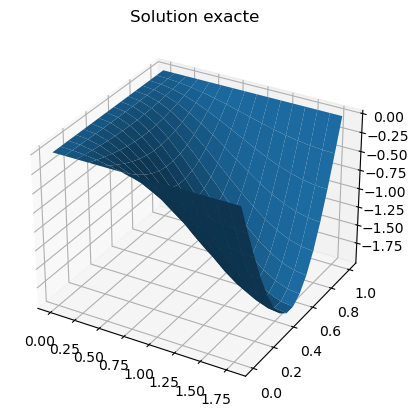

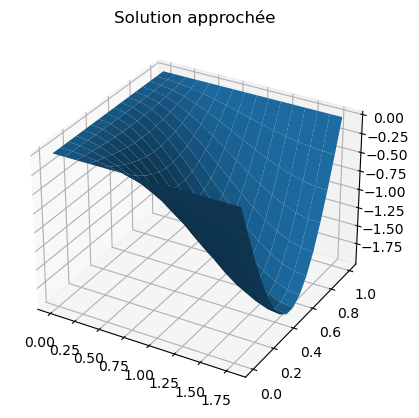

In [336]:
#Post-traitement u_ex+Visualiation of the exact solution
uu_ex = np.reshape(u_ex,(nx+2 ,ny+2),order = 'F');
X,Y = np.meshgrid(xx,yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu_ex.T,rstride = 1, cstride = 1);
plt.title("Solution exacte")

#solution approchée
u = npl.solve(A,F)
uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu.T,rstride = 1, cstride = 1);
plt.title("Solution approchée")

In [306]:
# Error
print('norm L2 = ',npl.norm(u-u_ex))

norm L2 =  0.04550078316861476


# Partie 2 : Approximation des termes advectifs

In [29]:
mu = 1
vx = 100 #test avec 10,20,30 etc...
B = scipy.sparse.diags([-mu/hx**2 - vx/(2*hx), mu*(2/hy**2 + 2/hx**2), -mu/hx**2 + vx/(2*hx)], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1
#premiere condition
# B[-1,-1] = 1
B[0,1]=0
# B[-1,-2] = 0
#deuxième condition
B[-1,-1]=3/(2*hx)
B[-1,-2]=-4/(2*hx)
B[-1,-3]=1/(2*hx)
# print(B)
# plt.imshow(B, cmap='viridis')

C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0
# plt.imshow(C, cmap='viridis')


A = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

# plt.imshow(A, cmap='viridis')

##  Solution and source terms
u = np.zeros((nx+2)*(ny+2)) #Numerical solution
u_ex = np.zeros((nx+2)*(ny+2)) #Exact solution
F = np.zeros((nx+2)*(ny+2)) #Source term
#

In [30]:
# Source term
def Source_int_2(x):
    return ((np.pi/xmax)**2 + np.pi**2)*(np.cos(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])) - (np.pi**2)*(np.sin(np.pi*x[1])) - vx*(np.pi/xmax)*np.sin(np.pi*x[1])*np.sin(np.pi*x[0]/xmax)
def Source_bnd_2(x): #= 0 
    return 0
    # return np.sin(np.pi*x[0]/xmax)*np.sin(np.pi*x[1]/ymax)
def Sol_sin_2(x):
    return (np.cos(np.pi*x[0]/xmax) -1)*np.sin(np.pi*x[1]/ymax)
for i in range(nptx):
    for j in range(npty):
        coord = np.array([i*hx,j*hy])
        u_ex[j*(nx+2) + i] = Sol_sin_2(coord)
    if i==0 or i==nptx-1: # Boundary x=0 ou x=xmax
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            F[j*(nx+2) + i]=Source_bnd_2(coord)
    else:
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            if j==0 or j==npty-1: # Boundary y=0 ou y=ymax
                F[j*(nx+2) + i]=Source_bnd_2(coord)
            else:
                F[j*(nx+2) + i]=Source_int_2(coord)

Text(0.5, 0.92, 'Solution approchée')

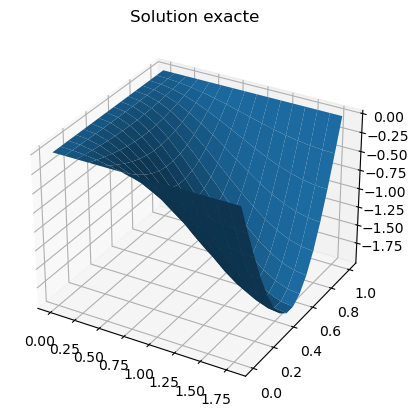

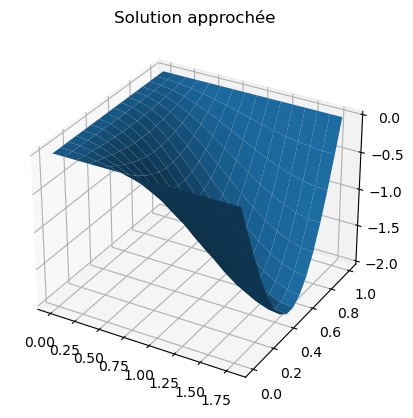

In [32]:
#Post-traintement u_ex+Visualization of the exct solution
uu_ex = np.reshape(u_ex,(nx+2 ,ny+2),order = 'F');
X,Y = np.meshgrid(xx,yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu_ex.T,rstride = 1, cstride = 1);
plt.title("Solution exacte")

#Solution approchée
u = npl.solve(A,F)
uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu.T,rstride = 1, cstride = 1);
plt.title("Solution approchée")

In [33]:
# Error
print('norm L2 = ',npl.norm(u-u_ex))

norm L2 =  0.09682756900190716


# Partie 3 : Marches en temps

In [313]:
#  Discrétisation en espace
xmin = 0.0; xmax = 2; nptx = 61; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 31; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

In [283]:
# =============================================================================
### Parameters
mu = 0.01 # Diffusion parameter
vx = 1 # Vitesse along x
# =============================================================================

cfl = 0.2  # cfl =mu*dt/hx^2+mu*dt/hy^2 ou v*dt/h
dt = (hx**2)*(hy**2)*cfl/(mu*(hx**2 + hy**2)) # dt = pas de temps
dt = cfl*hx/vx

dt = 0.1*dt
Tfinal = 1.0  # Temps final souhaité

# Calculer la norme de Frobenius
frobenius_norm = np.linalg.norm(A2D, 'fro')

# Afficher le résultat
print("Norme de Frobenius de la matrice A : ", frobenius_norm)
print(2/frobenius_norm)
print(dt)

Norme de Frobenius de la matrice A :  1926.543796543437
0.001038128488741526
0.0006666666666666668


In [290]:
B = scipy.sparse.diags([-mu/hx**2 - vx/(2*hx), mu*(2/hy**2 + 2/hx**2), -mu/hx**2 + vx/(2*hx)], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1
#premiere condition
# B[-1,-1] = 1
B[0,1]=0
# B[-1,-2] = 0
#deuxième condition
B[-1,-1]=3/(2*hx)
B[-1,-2]=-4/(2*hx)
B[-1,-3]=1/(2*hx)
# print(B)
# plt.imshow(B, cmap='viridis')

C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0
# plt.imshow(C, cmap='viridis')


A2D = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A2D[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A2D[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A2D[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A2D[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A2D[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])


#### Global matrix : diffusion + convection
# A2D = -(K2D + V2Dx) #-mu*Delta + V.grad



##  Cas explicite
u = np.zeros((nx+2)*(ny+2))
u_ex = np.zeros((nx+2)*(ny+2))
err = np.zeros((nx+2)*(ny+2))
F = np.zeros((nx+2)*(ny+2))
#

In [285]:
#
# =============================================================================
# Time stepping
# =============================================================================
s0 = 0.1
x0 = 0.25
y0=0.5

In [35]:
# def Sol_init(x):
#     return np.exp( -((x[0]-x0)/s0)**2 -((x[1]-y0)/s0)**2   )

# def Sol_init2(x):
#     if (s0**2 -(x[0] -x0)**2 - (x[1] - y0)**2) > 0:
#         return (s0**2 -(x[0] -x0)**2 - (x[1] - y0)**2)
#     else:
#         return 0

# u_init = np.zeros((nx+2)*(ny+2))
# u_init2 = np.zeros((nx+2)*(ny+2))

# for i in range(nptx):
#      for j in range(npty):
#              coord = np.array([xmin+i*hx,ymin+j*hy])
#              u_init[j*(nx+2) + i] = Sol_init(coord)
#              u_init2[j*(nx+2) + i] = Sol_init2(coord)


# uu_init = np.reshape(u_init,(nx+2 ,ny+2),order = 'F');
# uu_init = np.reshape(u_init2,(nx+2 ,ny+2),order = 'F');

# fig = plt.figure(figsize=(10, 7))
# X,Y = np.meshgrid(xx,yy)
# ax = plt.axes(projection='3d')
# surf = ax.plot_surface(X, Y, uu_init.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
# ax.view_init(60, 35)
# plt.pause(1.)
             
# ## Initialize u by the initial data u0
# u = u_init2.copy()

# # Nombre de pas de temps effectues
# nt = int(Tfinal/dt)
# Tfinal = nt*dt # on corrige le temps final (si Tfinal/dt n'est pas entier)

# def CN(u0, dt, A2D):
#     m = len(u0)
#     u0[0:m] = np.linalg.solve(np.eye(m)/dt + A2D/2, (np.eye(m)/dt - A2D/2)@u0[0:m])
#     # u0[0:m] = np.linalg.inv(np.eye(m)/dt + A2D/2)@(np.eye(m)/dt - A2D/2)@u0[0:m]
#     return u0
    

# time = 0.0
# u_1 = CN(u, dt, A2D)
# n = 0
# while time < Tfinal:
#     u_1 = CN(u_1, dt, A2D)
#     time = time + dt
#     n += 1
    
    
    

 # Print solution
    # if n%20 == 0:
    #   plt.figure(1)
    #   plt.clf()
    #   fig = plt.figure(figsize=(10, 7))
    #   ax = plt.axes(projection='3d')
    #   uu = np.reshape(u_1,(nx+2 ,ny+2),order = 'F');
    #   surf = ax.plot_surface(X, Y, uu.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    #   ax.view_init(60, 35)
    #   plt.title(['Schema explicite avec CFL=%s' %(cfl), '$t=$%s' %(n*dt)])
    #   plt.pause(0.1)

####################################################################
# comparaison solution exacte avec solution numerique au temps final
# j0 = int((npty-1)/2)


# plt.figure(2)
# plt.clf()
# x = np.linspace(xmin,xmax,nptx)
# plt.plot(x,uu_init[:,j0],x,uu[:,j0],'k') #,x,uexacte,'or')
# plt.legend(['Solution initiale','Schema explicite =%s' %(cfl)]) #,'solution exacte'],loc='best')
# plt.axhline(y=0.2, color='r', linestyle='--')
# plt.show()

Tadmorv 